# Train with fastai
This Jupyter notebook uses [fastai](https://github.com/fastai/fastai), a Python library for deep learning, to train a convolutional neural network (CNN) on an image dataset. The notebook loads and preprocesses the image data, then uses a pretrained CNN architecture from the [timm](https://github.com/huggingface/pytorch-image-models) library to fine-tune the model on the dataset. Finally, the trained model is saved for future use.

<!--<badge>--><a href="https://colab.research.google.com/github/visual-layer/vl-datasets/blob/master/notebooks/train-fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [1]:
!pip install fastai -Uqq
!pip install timm -Uqq

## Import Libraries

The `fastai.vision.all` module contains all the classes and functions for computer vision tasks in the fastai library, while the timm library provides a collection of state-of-the-art CNN architectures for image classification.

In [2]:
from fastai.vision.all import *
import timm

## Load and Preprocess the Data
The next step is to load and preprocess the image data using the fastai library. The dataset is assumed to be organized in a directory structure with separate train and validation folders. 


`ImageDataLoaders.from_folder` function let's you specify the path of the train and validation set. The labels are the name of the parent folder. The batch_tfms argument specifies the data augmentation transformations to apply to the images during training. In this case, the aug_transforms function is used to apply random cropping, flipping, rotation, and zooming to the images, with a scaling factor of 1.5, a minimum scale of 0.75, and a size of 150. The item_tfms argument specifies the transformations to apply to the images before they are fed into the CNN, and in this case, a Resize transformation is used to resize the images to 224x224 pixels. The bs argument specifies the batch size to use during training.




In [3]:
# Define the paths to the train and validation directories
path = Path('data')

# Load the data using the fastai library
dls = ImageDataLoaders.from_folder(path=path, train='train_set', valid='valid_set', 
                                   batch_tfms=aug_transforms(mult=1.5, size=150, min_scale=0.75),
                                   item_tfms=Resize(224), bs=32)

To get a sense of what the data looks like after the preprocessing, the following code is used to show a batch of images from the training set:

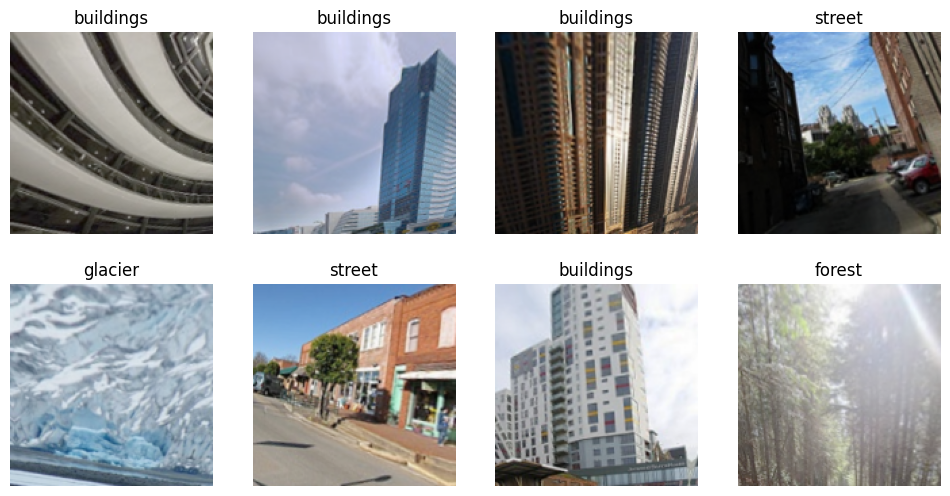

In [4]:
dls.train.show_batch(max_n=8, nrows=2)

## Define and Train the Model

The next step is to define and train the CNN model using the Fastai library. The following code defines a vision learner with the convnext_tiny_in22k architecture from the timm library and the accuracy metric.

The vision_learner function creates a CNN model with the specified architecture and data, and the metrics argument specifies the evaluation metric to use during training. In this case, the accuracy metric is used to measure the percentage of correctly classified images. The to_fp16 method is used to convert the model to half-precision floating-point format, which reduces memory usage and speeds up training.

In [5]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy).to_fp16()

The next step is to find the optimal learning rate for training the model using the following code:

SuggestedLRs(valley=0.0008317637839354575)

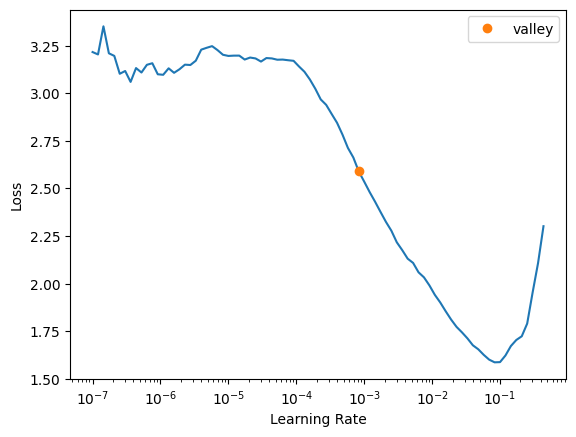

In [6]:
learn.lr_find()

This function finds the learning rate that results in the steepest decrease in the loss function during training, which is a good starting point for fine-tuning the model.

Finally, the following code is used to fine-tune the model on the dataset for 5 epochs with a learning rate of 1e-3 and a ShowGraphCallback to plot the training and validation loss over time:



epoch,train_loss,valid_loss,accuracy,time
0,0.337384,0.205617,0.935333,00:17


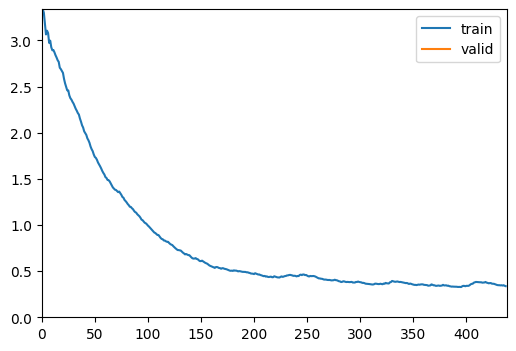

epoch,train_loss,valid_loss,accuracy,time
0,0.248751,0.175257,0.944333,00:23
1,0.208927,0.166212,0.941667,00:23
2,0.172998,0.163879,0.940333,00:23
3,0.167292,0.146122,0.946000,00:23
4,0.150512,0.145727,0.944667,00:23


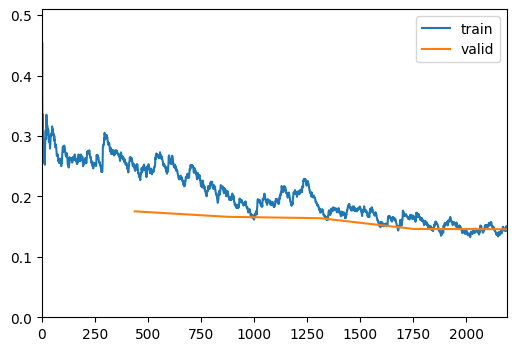

In [7]:
learn.fine_tune(5, base_lr=1e-3, cbs=[ShowGraphCallback()])

The fine_tune method is used to fine-tune the model on the dataset for the specified number of epochs, and the base_lr argument specifies the learning rate to use for the final layers of the model. The ShowGraphCallback is a custom callback that plots the training and validation loss over time.



## Evaluate Results
Once of the ways to learn about the performance of your model is to evaluate it on the validation set. For classification tasks it's easy to use confusion matrix to gauge the model performance.

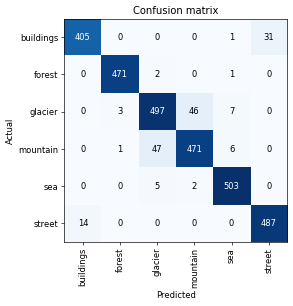

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

## Export the Trained Model

The export method is used to save the model to a file with the specified path and name. This trained model can be loaded later for inference or further fine-tuning.

In [9]:
learn.export("./models/learner.pkl")

That's it! This notebook shows how to train a CNN model using the Fastai library with a pretrained architecture from the timm library. By following the steps in this notebook, you can easily train your own CNN models on image datasets using fastai.



